<a href="https://colab.research.google.com/github/diegomarlop/LAB_IRONHACK/blob/main/Lab7_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab | Handling Data Imbalance in Classification Models

##Scenario
You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

In [34]:
##Import the required libraries and modules that you would need.
import pandas as pd 
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [35]:
#Read that data into Python and call the dataframe churnData.
churnData = pd.read_csv('Customer-Churn.csv')
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [3]:
#Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type.
#Convert this column into numeric type using pd.to_numeric function
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [36]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'],errors='coerce')

In [37]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

In [38]:
#Check for null values in the dataframe. Replace the null values.
for i in churnData:
  print(i,':',churnData[i].isna().sum())

gender : 0
SeniorCitizen : 0
Partner : 0
Dependents : 0
tenure : 0
PhoneService : 0
OnlineSecurity : 0
OnlineBackup : 0
DeviceProtection : 0
TechSupport : 0
StreamingTV : 0
StreamingMovies : 0
Contract : 0
MonthlyCharges : 0
TotalCharges : 11
Churn : 0


In [39]:
for i in churnData:
  print(churnData[i].value_counts(dropna=False))

Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, 

In [40]:
churnData['TotalCharges'] = churnData['TotalCharges'].fillna(np.mean(churnData['TotalCharges']))

In [41]:
for i in churnData:
  print(i,':',churnData[i].isna().sum())

gender : 0
SeniorCitizen : 0
Partner : 0
Dependents : 0
tenure : 0
PhoneService : 0
OnlineSecurity : 0
OnlineBackup : 0
DeviceProtection : 0
TechSupport : 0
StreamingTV : 0
StreamingMovies : 0
Contract : 0
MonthlyCharges : 0
TotalCharges : 0
Churn : 0


In [42]:
"""
Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
Scale the features either by using normalizer or a standard scaler.
Split the data into a training set and a test set.
Fit a logistic regression model on the training data.
Check the accuracy on the test data.

"""
churnData = churnData.drop(['gender','Partner','Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','Churn'],axis=1)

In [18]:
#churnData = churnData.astype({'SeniorCitizen': 'object'})

In [43]:
churnData.dtypes

SeniorCitizen       int64
tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

In [44]:
X = churnData.drop('SeniorCitizen',axis=1)

In [46]:
y = churnData['SeniorCitizen']

In [47]:
from sklearn.preprocessing import Normalizer
transformer=Normalizer().fit(X)
x_norm=transformer.transform(X)
#x_norm=pd.DataFrame(x_norm)

In [25]:
from sklearn.preprocessing import StandardScaler
transformer=StandardScaler().fit(X)
x_stand=transformer.transform(X)
x_stand=pd.DataFrame(x_stand)

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_stand,y,test_size=0.2, random_state=1000)

In [61]:
from sklearn.linear_model import LogisticRegression
classification=LogisticRegression(random_state=0,solver='lbfgs',multi_class='ovr').fit(X_train,y_train)

In [62]:
predictions=classification.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as  plt 

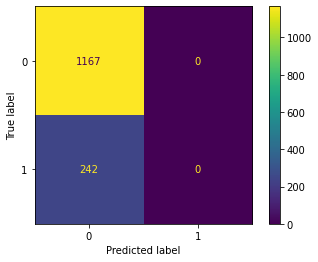

In [67]:
plot_confusion_matrix(classification,X_test,y_test)
plt.show()

In [64]:
cohen_kappa_score(y_test,predictions) 

0.0

In [ ]:
#Managing imbalance in the dataset

In [73]:
category_0 = churnData[churnData['SeniorCitizen'] == 0]
category_1 = churnData[churnData['SeniorCitizen'] == 1]

In [76]:
print(len(category_0))
print(len(category_1))
category_0=category_0.sample(len(category_1))
print(len(category_0))
print(len(category_1))
churnData=pd.concat([category_0,category_1],axis=0)

5901
1142
1142
1142


In [77]:
churnData

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
6595,0,71,82.55,5832.65
3359,0,21,19.95,416.40
6386,0,72,83.55,6093.30
1354,0,18,88.35,1639.30
1911,0,72,106.10,7657.40
...,...,...,...,...
7023,1,63,103.50,6479.40
7029,1,6,44.40,263.05
7031,1,55,60.00,3316.10
7032,1,1,75.75,75.75


In [79]:
churnData = churnData.sample(frac=1)
churnData

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3383,0,6,75.50,438.00
1732,1,61,99.00,5969.30
703,0,2,20.55,33.60
5431,0,37,19.80,695.05
1713,0,52,61.35,3169.55
...,...,...,...,...
6173,1,35,91.00,3180.50
459,0,1,75.10,75.10
1582,0,56,65.20,3512.15
4861,1,48,58.95,2789.70


In [80]:
X = churnData.drop('SeniorCitizen',axis=1)

In [81]:
y = churnData['SeniorCitizen']

In [82]:
from sklearn.preprocessing import StandardScaler
transformer=StandardScaler().fit(X)
x_stand=transformer.transform(X)
x_stand=pd.DataFrame(x_stand)

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_stand,y,test_size=0.2, random_state=1000)

In [84]:
from sklearn.linear_model import LogisticRegression
classification=LogisticRegression(random_state=0,solver='lbfgs',multi_class='ovr').fit(X_train,y_train)

In [85]:
predictions=classification.predict(X_test)

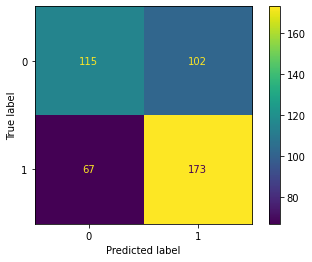

In [86]:
plot_confusion_matrix(classification,X_test,y_test)
plt.show()

In [87]:
cohen_kappa_score(y_test,predictions) 

0.25274055439988397